# Setup

In [2]:
import pandas as pd
import polars as pl 
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from all import NLP_Preprocessing

from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer)
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder)
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix)

from tensorflow import keras
from keras import layers

In [3]:
tools = NLP_Preprocessing()

In [4]:
data = pl.read_csv("./dataset.csv")

In [5]:
data.head()

app_id,app_name,review_text,review_score,review_votes
i64,str,str,i64,i64
10,"""Counter-Strike""","""Ruined my life.""",1,0
10,"""Counter-Strike""","""This will be more of a ''my ex…",1,1
10,"""Counter-Strike""","""This game saved my virginity.""",1,0
10,"""Counter-Strike""","""• Do you like original games? …",1,0
10,"""Counter-Strike""",""" Easy to learn, hard to…",1,1


In [6]:
data.shape

(6417106, 5)

In [7]:
data["review_score"].value_counts()["review_score"]

review_score
i64
-1
1


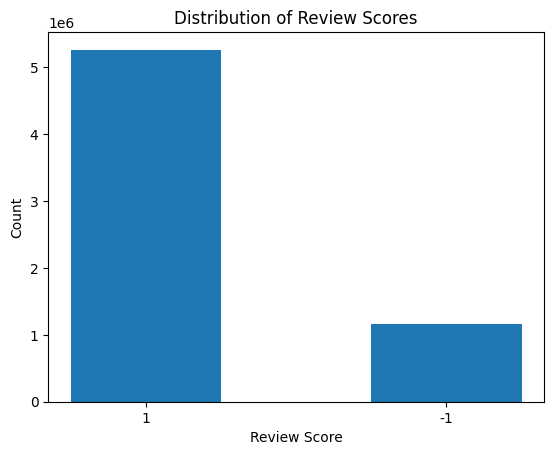

In [8]:
value_counts = data["review_score"].value_counts()
cols = value_counts["review_score"].to_numpy().astype(str)
counts = value_counts["count"].to_numpy() 

plt.bar(cols, counts, width=0.5)
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")
plt.show()

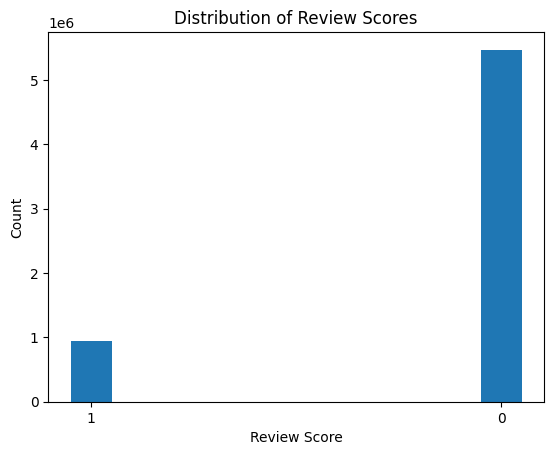

In [9]:
value_counts = data["review_votes"].value_counts()
cols = value_counts["review_votes"].to_numpy().astype(str)
counts = value_counts["count"].to_numpy() 

plt.bar(cols, counts, width=0.1)
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")
plt.show()

# Tiền xử lý dữ liệu

In [10]:
data.null_count()

app_id,app_name,review_text,review_score,review_votes
u32,u32,u32,u32,u32
0,183234,7305,0,0


In [11]:
data.null_count()*100/len(data)

app_id,app_name,review_text,review_score,review_votes
f64,f64,f64,f64,f64
0.0,2.855399,0.113836,0.0,0.0


In [12]:
data["review_text"].null_count()/len(data)

0.0011383636174936177

In [13]:
data = data[:, ["review_text", "review_votes"]]

In [14]:
data = data.drop_nulls()

In [15]:
data.null_count()*100/len(data)

review_text,review_votes
f64,f64
0.0,0.0


In [16]:
data = data.unique()

In [17]:
data.shape

(4483987, 2)

# Chọn dữ liệu nhỏ hơn

In [18]:
n_sample = 50

In [19]:
# Tron du lieu dam bao tinh ngau nhien
shuffled_data = data.sample(fraction=1, shuffle=True, seed=42)

In [20]:
# Lay n phan tu cua tieu cuc
votes_0 = shuffled_data.filter(pl.col("review_votes") == 0)
votes_0 = votes_0.head(n_sample)
votes_0.head()

review_text,review_votes
str,i64
"""The pinnacle of gaming. Truly …",0
"""the game is amazing. best part…",0
"""'This is RuptureFarms. They sa…",0
"""A cute 2 minutes game nothing …",0
"""hate it i just hate it ever ru…",0


In [21]:
votes_1 = shuffled_data.filter(pl.col("review_votes") == 1)
votes_1 = votes_1.head(n_sample)
votes_1.head()

review_text,review_votes
str,i64
"""Earth 2150 is an old 3D Real-T…",1
"""Very cool, but I dont play too…",1
"""I just got done fighting Credo…",1
"""DEVELOPER HAS STOPPED SUPPORTI…",1
"""GET THIS GAME ITS SO AWESOME B…",1


In [22]:
small_data = pl.concat([votes_0, votes_1])
print(small_data["review_votes"].unique())
small_data.shape

shape: (2,)
Series: 'review_votes' [i64]
[
	0
	1
]


(100, 2)

In [23]:
docs = small_data["review_text"]
labels = small_data["review_votes"]

In [24]:
tokens = tools.preprocess(docs)
docs = tools.get_corpus(tokens)

In [25]:
print(tokens[0])
print(docs[0])

['pinnacl', 'game', 'truli', 'mirror', 'modern', 'day', 'struggl', 'rat', 'face']
pinnacl game truli mirror modern day struggl rat face
